In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy.stats import pearsonr
import re
import os

In [2]:
out_dir = "output"
os.makedirs(out_dir, exist_ok=True)

In [3]:
df = pd.read_csv('./output/clinical_data_all.csv')
df

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass
0,X6,81,männlich,0.010,1.20,55.00,ANCA,ARRS low (0/11)
1,X3,55,weiblich,0.440,1.60,35.00,ANCA,ARRS medium (2/11)
2,X4,59,männlich,1.200,2.40,28.26,ANCA,ARRS medium (2/11)
3,X17,72,weiblich,0.425,1.10,49.93,ANCA,ARRS low (0/11)
4,X25,52,männlich,3.250,3.70,17.59,ANCA,ARRS high (8/11)
...,...,...,...,...,...,...,...,...
58,X2,71,female,NaN,0.93,61.00,Liposarcoma retroperitoneal,NaN
59,X9,71,female,NaN,0.93,61.00,Liposarcoma retroperitoneal,NaN
60,X10,61,female,NaN,0.72,90.00,Transitional cell carcinoma,NaN
61,X41,57,male,NaN,1.07,91.00,clear cell renal cell carcinoma,NaN


### All Slides: PC1 values

In [4]:
adata_pt = sc.read_h5ad("/data/projects/robin/segmentation/xenium_outs/adata_polygon_reduced_pseudotime_X26updated_with_quadrants_with_clusters.h5ad")


In [5]:
pc1 = adata_pt.obsm["X_pca"][:,0]
pc2 = adata_pt.obsm["X_pca"][:,1]

adata_pt.obs['PC1'] = pc1
adata_pt.obs['PC2'] = pc2

In [6]:
df_pt = adata_pt.obs.copy()
df_pt.rename(columns={"dpt_PC1": "PC1"}, inplace=True)
df_pt

,Disease,dpt_pseudotime,quadrant,Sample_ID,KMeans_cluster,PC1,PC2
polygon_flags,,,,,,,
0_0011216_ANCA_X17,ANCA,0.444406,1,X17,C3,0.512626,-0.018312
0_0011216_ANCA_X18,ANCA,0.598062,2,X18,C4,1.136992,-0.016451
0_0011216_ANCA_X19,ANCA,0.620515,2,X19,C4,1.170726,-0.407808
0_0011216_ANCA_X20,ANCA,0.416691,1,X20,C3,0.467239,-0.057754
0_0011216_GBM_X21,GBM,0.833587,3,X21,C4,1.585127,-0.721576
...,...,...,...,...,...,...,...
9_0011762_Cntrl_X1,Cntrl,0.105040,0,X1,C2,-0.456176,0.451678
9_0018775_ANCA_X58,ANCA,0.479633,2,X58,C3,0.685558,0.137973
9_0018775_ANCA_X60,ANCA,0.326151,1,X60,C2,-0.361374,-0.203304


In [7]:
# Remove rows with ',' in the index values
df_pt = df_pt[~df_pt.index.str.contains(',')]

# Reset the index to make it a column
df_pt = df_pt.reset_index()
df_pt

,polygon_flags,Disease,dpt_pseudotime,quadrant,Sample_ID,KMeans_cluster,PC1,PC2
0,0_0011216_ANCA_X17,ANCA,0.444406,1,X17,C3,0.512626,-0.018312
1,0_0011216_ANCA_X18,ANCA,0.598062,2,X18,C4,1.136992,-0.016451
2,0_0011216_ANCA_X19,ANCA,0.620515,2,X19,C4,1.170726,-0.407808
3,0_0011216_ANCA_X20,ANCA,0.416691,1,X20,C3,0.467239,-0.057754
4,0_0011216_GBM_X21,GBM,0.833587,3,X21,C4,1.585127,-0.721576
...,...,...,...,...,...,...,...,...
777,9_0011762_Cntrl_X1,Cntrl,0.105040,0,X1,C2,-0.456176,0.451678
778,9_0018775_ANCA_X58,ANCA,0.479633,2,X58,C3,0.685558,0.137973
779,9_0018775_ANCA_X60,ANCA,0.326151,1,X60,C2,-0.361374,-0.203304
780,9_0018775_ANCA_X63,ANCA,0.947872,3,X63,C4,1.345954,-0.554141


In [8]:
# Split the 'polygon_flags' column into multiple columns and assign column names directly
df_pt[['Glom_no', 'Slide_ID', 'Disease', 'Biopsy_ID']] = df_pt['polygon_flags'].str.split('_', expand=True)

df_pt = df_pt.drop(columns=['polygon_flags'])

df_pt

,Disease,dpt_pseudotime,quadrant,Sample_ID,KMeans_cluster,PC1,PC2,Glom_no,Slide_ID,Biopsy_ID
0,ANCA,0.444406,1,X17,C3,0.512626,-0.018312,0,0011216,X17
1,ANCA,0.598062,2,X18,C4,1.136992,-0.016451,0,0011216,X18
2,ANCA,0.620515,2,X19,C4,1.170726,-0.407808,0,0011216,X19
3,ANCA,0.416691,1,X20,C3,0.467239,-0.057754,0,0011216,X20
4,GBM,0.833587,3,X21,C4,1.585127,-0.721576,0,0011216,X21
...,...,...,...,...,...,...,...,...,...,...
777,Cntrl,0.105040,0,X1,C2,-0.456176,0.451678,9,0011762,X1
778,ANCA,0.479633,2,X58,C3,0.685558,0.137973,9,0018775,X58
779,ANCA,0.326151,1,X60,C2,-0.361374,-0.203304,9,0018775,X60
780,ANCA,0.947872,3,X63,C4,1.345954,-0.554141,9,0018775,X63


In [9]:
# Define the order for the diseases
disease_order = ['Cntrl', 'SLE', 'ANCA', 'GBM']
df_pt['Disease'] = pd.Categorical(df_pt['Disease'], categories=disease_order, ordered=True)

# Dictionary to assign a unique color to each Disease
color_map = {'Cntrl': 'navy', 'SLE': 'green', 'ANCA': 'orange', 'GBM': 'red'}


In [10]:
# Count the unique Glom_no in each KMeans_cluster for each Biopsy_ID
KMeans_cluster_counts = df_pt.groupby(['Biopsy_ID', 'KMeans_cluster'])['Glom_no'].nunique().unstack(fill_value=0)
KMeans_cluster_counts

/tmp/ipykernel_11796/1157582917.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  KMeans_cluster_counts = df_pt.groupby(['Biopsy_ID', 'KMeans_cluster'])['Glom_no'].nunique().unstack(fill_value=0)


KMeans_cluster,C1,C2,C3,C4
Biopsy_ID,,,,
X1,30,5,1,0
X10,10,54,0,0
X12,0,0,3,0
X13,0,0,2,10
X14,0,2,5,3
X15,0,6,0,1
X16,0,5,4,0
X17,2,1,9,2
X18,0,0,2,3


In [11]:
# Ensure each Biopsy_ID has a single unique Disease & PC1
biopsy_info = df_pt.groupby('Biopsy_ID', as_index=False).agg({
    'Disease': 'first',  #take the first occurrence
    'PC1': 'median'  # Use median PC1 of all gloms of this biopsz
})
biopsy_info

,Biopsy_ID,Disease,PC1
0,X1,Cntrl,-0.564160
1,X10,Cntrl,-0.776936
2,X12,ANCA,0.523362
3,X13,GBM,1.078501
4,X14,ANCA,0.391004
5,X15,SLE,-0.474816
6,X16,SLE,0.197557
7,X17,ANCA,0.365794
8,X18,ANCA,0.673121
9,X19,ANCA,1.112875


In [12]:
# Merge with KMeans_cluster counts
KMeans_cluster_counts = KMeans_cluster_counts.merge(biopsy_info, on='Biopsy_ID', how='left')
KMeans_cluster_counts

,Biopsy_ID,C1,C2,C3,C4,Disease,PC1
0,X1,30,5,1,0,Cntrl,-0.564160
1,X10,10,54,0,0,Cntrl,-0.776936
2,X12,0,0,3,0,ANCA,0.523362
3,X13,0,0,2,10,GBM,1.078501
4,X14,0,2,5,3,ANCA,0.391004
5,X15,0,6,0,1,SLE,-0.474816
6,X16,0,5,4,0,SLE,0.197557
7,X17,2,1,9,2,ANCA,0.365794
8,X18,0,0,2,3,ANCA,0.673121
9,X19,0,0,0,5,ANCA,1.112875


In [13]:
# Normalize the counts by the total counts for each Biopsy_ID
KMeans_cluster_counts[['C1', 'C2', 'C3', 'C4']] = KMeans_cluster_counts[['C1', 'C2', 'C3', 'C4']].div(
    KMeans_cluster_counts[['C1', 'C2', 'C3', 'C4']].sum(axis=1), axis=0
)
KMeans_cluster_counts

,Biopsy_ID,C1,C2,C3,C4,Disease,PC1
0,X1,0.833333,0.138889,0.027778,0.000000,Cntrl,-0.564160
1,X10,0.156250,0.843750,0.000000,0.000000,Cntrl,-0.776936
2,X12,0.000000,0.000000,1.000000,0.000000,ANCA,0.523362
3,X13,0.000000,0.000000,0.166667,0.833333,GBM,1.078501
4,X14,0.000000,0.200000,0.500000,0.300000,ANCA,0.391004
5,X15,0.000000,0.857143,0.000000,0.142857,SLE,-0.474816
6,X16,0.000000,0.555556,0.444444,0.000000,SLE,0.197557
7,X17,0.142857,0.071429,0.642857,0.142857,ANCA,0.365794
8,X18,0.000000,0.000000,0.400000,0.600000,ANCA,0.673121
9,X19,0.000000,0.000000,0.000000,1.000000,ANCA,1.112875


In [14]:
# Sort first by Disease, then by increasing PC1
KMeans_cluster_counts.sort_values(['Disease', 'PC1'], ascending=[True, True], inplace=True)

# Set index for heatmap  
KMeans_cluster_counts.set_index('Biopsy_ID', inplace=True)

# store PC1 separately
PC1_values = KMeans_cluster_counts['PC1']

# Drop PC1 before plotting heatmap
#KMeans_cluster_counts.drop(columns=['PC1'], inplace=True)

# Heatmap Data (only numerical values)
heatmap_data = KMeans_cluster_counts[['C1', 'C2', 'C3', 'C4']]

In [15]:
biopsy_info

,Biopsy_ID,Disease,PC1
0,X1,Cntrl,-0.564160
1,X10,Cntrl,-0.776936
2,X12,ANCA,0.523362
3,X13,GBM,1.078501
4,X14,ANCA,0.391004
5,X15,SLE,-0.474816
6,X16,SLE,0.197557
7,X17,ANCA,0.365794
8,X18,ANCA,0.673121
9,X19,ANCA,1.112875


In [16]:
KMeans_cluster_counts

,C1,C2,C3,C4,Disease,PC1
Biopsy_ID,,,,,,
X9,1.000000,0.000000,0.000000,0.000000,Cntrl,-0.978686
X41,1.000000,0.000000,0.000000,0.000000,Cntrl,-0.965180
X10,0.156250,0.843750,0.000000,0.000000,Cntrl,-0.776936
X57,0.972222,0.027778,0.000000,0.000000,Cntrl,-0.691212
X2,1.000000,0.000000,0.000000,0.000000,Cntrl,-0.628834
X1,0.833333,0.138889,0.027778,0.000000,Cntrl,-0.564160
X47,0.052632,0.894737,0.052632,0.000000,SLE,-0.572623
X15,0.000000,0.857143,0.000000,0.142857,SLE,-0.474816
X8,1.000000,0.000000,0.000000,0.000000,SLE,-0.449402


In [17]:
df_clinical=pd.read_csv(os.path.join(out_dir,'ClinicalData_medianPC1.csv' ))
df_clinical.drop(columns='disease', inplace= True)
df_clinical

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,ARRscore_SLEclass,Biopsy_ID,Total_gloms_on_biopsy,Median_PC1
0,X6,81,männlich,0.010,1.20,55.000000,ARRS low (0/11),X6,5,-0.181733
1,X3,55,weiblich,0.440,1.60,35.000000,ARRS medium (2/11),X3,10,0.273051
2,X4,59,männlich,1.200,2.40,28.260000,ARRS medium (2/11),X4,7,-0.102901
3,X17,72,weiblich,0.425,1.10,49.930000,ARRS low (0/11),X17,14,0.365794
4,X25,52,männlich,3.250,3.70,17.590000,ARRS high (8/11),X25,5,0.754072
5,X27,46,männlich,0.760,4.70,13.740000,ARRS medium (5/11),X27,15,0.959444
6,X18,43,männlich,NaN,3.30,21.520000,ARRS medium (2/11),X18,5,0.673121
7,X33,65,männlich,NaN,NaN,NaN,na,X33,10,0.171400
8,X28,47,männlich,NaN,2.58,28.170000,ARRS medium (2/11),X28,4,0.406449
9,X50,24,weiblich,NaN,0.63,125.070000,ARRS low (0/11),X50,5,0.409695


In [18]:
merged_df = KMeans_cluster_counts.reset_index().merge(df_clinical, on='Biopsy_ID', how='left')
merged_df

,Biopsy_ID,C1,C2,C3,C4,Disease,PC1,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,ARRscore_SLEclass,Total_gloms_on_biopsy,Median_PC1
0,X9,1.000000,0.000000,0.000000,0.000000,Cntrl,-0.978686,X9,71,female,NaN,0.93,61.000000,NaN,13,-0.978686
1,X41,1.000000,0.000000,0.000000,0.000000,Cntrl,-0.965180,X41,57,male,NaN,1.07,91.000000,NaN,44,-0.965180
2,X10,0.156250,0.843750,0.000000,0.000000,Cntrl,-0.776936,X10,61,female,NaN,0.72,90.000000,NaN,64,-0.776936
3,X57,0.972222,0.027778,0.000000,0.000000,Cntrl,-0.691212,X57,78,male,NaN,1.20,63.000000,NaN,72,-0.691212
4,X2,1.000000,0.000000,0.000000,0.000000,Cntrl,-0.628834,X2,71,female,NaN,0.93,61.000000,NaN,7,-0.628834
5,X1,0.833333,0.138889,0.027778,0.000000,Cntrl,-0.564160,X1,54,female,NaN,0.57,106.000000,NaN,36,-0.564160
6,X47,0.052632,0.894737,0.052632,0.000000,SLE,-0.572623,X47,33,weiblich,0.137,0.86,89.040001,Klasse III,19,-0.572623
7,X15,0.000000,0.857143,0.000000,0.142857,SLE,-0.474816,X15,30,weiblich,1.940,1.10,67.000000,Klasse III,7,-0.474816
8,X8,1.000000,0.000000,0.000000,0.000000,SLE,-0.449402,X8,25,weiblich,3.265,0.82,97.690002,Klasse III+V,2,-0.449402
9,X24,0.000000,0.947368,0.052632,0.000000,SLE,-0.348099,X24,38,weiblich,0.274,0.49,123.120003,Klasse III+V,19,-0.348099


In [19]:
# Set index back to Biopsy_ID
merged_df.set_index('Biopsy_ID', inplace=True)
merged_df

,C1,C2,C3,C4,Disease,PC1,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,ARRscore_SLEclass,Total_gloms_on_biopsy,Median_PC1
Biopsy_ID,,,,,,,,,,,,,,,
X9,1.000000,0.000000,0.000000,0.000000,Cntrl,-0.978686,X9,71,female,NaN,0.93,61.000000,NaN,13,-0.978686
X41,1.000000,0.000000,0.000000,0.000000,Cntrl,-0.965180,X41,57,male,NaN,1.07,91.000000,NaN,44,-0.965180
X10,0.156250,0.843750,0.000000,0.000000,Cntrl,-0.776936,X10,61,female,NaN,0.72,90.000000,NaN,64,-0.776936
X57,0.972222,0.027778,0.000000,0.000000,Cntrl,-0.691212,X57,78,male,NaN,1.20,63.000000,NaN,72,-0.691212
X2,1.000000,0.000000,0.000000,0.000000,Cntrl,-0.628834,X2,71,female,NaN,0.93,61.000000,NaN,7,-0.628834
X1,0.833333,0.138889,0.027778,0.000000,Cntrl,-0.564160,X1,54,female,NaN,0.57,106.000000,NaN,36,-0.564160
X47,0.052632,0.894737,0.052632,0.000000,SLE,-0.572623,X47,33,weiblich,0.137,0.86,89.040001,Klasse III,19,-0.572623
X15,0.000000,0.857143,0.000000,0.142857,SLE,-0.474816,X15,30,weiblich,1.940,1.10,67.000000,Klasse III,7,-0.474816
X8,1.000000,0.000000,0.000000,0.000000,SLE,-0.449402,X8,25,weiblich,3.265,0.82,97.690002,Klasse III+V,2,-0.449402


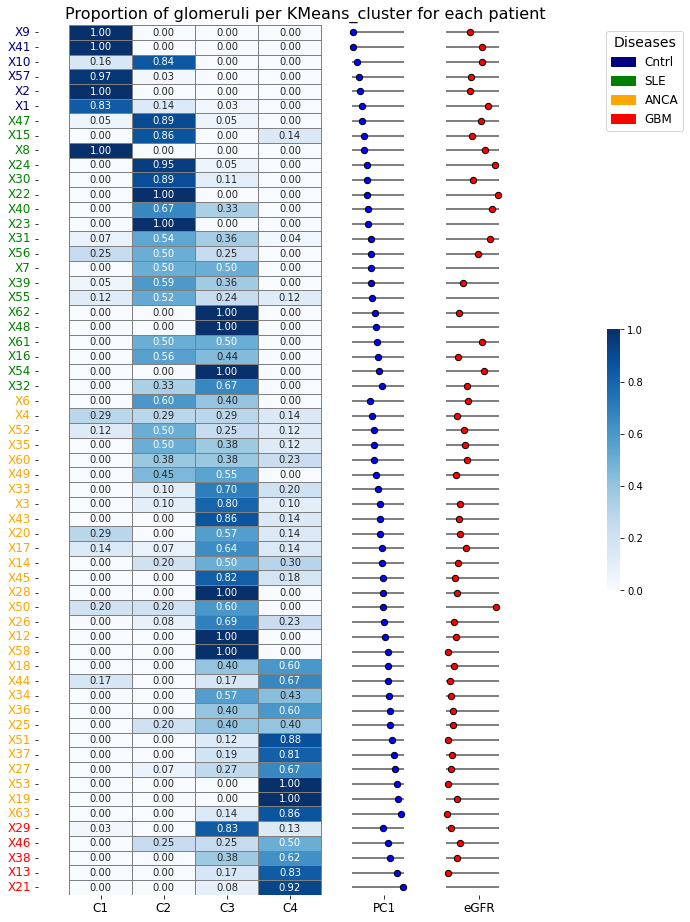

In [21]:
# Store PC1 & eGFR separately
PC1_values = merged_df['PC1']
egfr_values = merged_df['eGFR']

# Normalize eGFR to [0,1] scale for slider visualization
egfr_values = (egfr_values - egfr_values.min()) / (egfr_values.max() - egfr_values.min())

# Normalize PC1 values to [0,1] scale for slider visualization
PC1_values = (PC1_values - PC1_values.min()) / (PC1_values.max() - PC1_values.min())

# Assign a unique color to each Disease
color_map = {'Cntrl': 'navy', 'SLE': 'green', 'ANCA': 'orange', 'GBM': 'red'}

# Heatmap Data (only numerical values)
heatmap_data = merged_df[['C1', 'C2', 'C3', 'C4']]

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 16))  # Wider to accommodate two sliders
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": 0.3}, linecolor='grey', ax=ax)

ax.set_title('Proportion of glomeruli per KMeans_cluster for each patient', fontsize=16)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel('', fontsize=16)

# Apply color to y-tick labels based on disease
labels = ax.get_yticklabels()
for label in labels:
    biopsy_id = label.get_text()  # Get Biopsy_ID from y-axis label
    if biopsy_id in merged_df.index:
        disease = merged_df.loc[biopsy_id, 'Disease']
        label.set_color(color_map.get(disease, 'black'))  # Default to black if unknown
        label.set_fontsize(12)  # Increase font size

# Add PC1 and eGFR sliders
for y, biopsy_id in enumerate(merged_df.index):
    pt_value = PC1_values.loc[biopsy_id]  # Get PC1 value
    egfr_value = egfr_values.loc[biopsy_id]  # Get eGFR value
    
    x_pos_pseudo = 4.5  # Position of the PC1 slider
    x_pos_egfr = 6.0  # Position of the eGFR slider

    # Draw grey horizontal line (slider background)
    ax.plot([x_pos_pseudo, x_pos_pseudo + 0.8], [y + 0.5, y + 0.5], color='grey', linewidth=2)
    ax.plot([x_pos_egfr, x_pos_egfr + 0.8], [y + 0.5, y + 0.5], color='grey', linewidth=2)

    # Plot  dot at actual PC1 value
    pt_x = x_pos_pseudo + (pt_value * 0.8)  # Scale PC1 to fit slider
    ax.scatter(pt_x, y + 0.5, color='blue', s=40, edgecolor='black', zorder=3)

    # Plot  dot at actual eGFR value
    egfr_x = x_pos_egfr + (egfr_value * 0.8)  # Scale eGFR to fit slider
    ax.scatter(egfr_x, y + 0.5, color='red', s=40, edgecolor='black', zorder=3)

# Adjust x-axis labels to include 'PC1' & 'eGFR' as separate columns
ax.set_xticks([0.5, 1.5, 2.5, 3.5, 5, 6.5])  # Adjust positions for extra space
ax.set_xticklabels(['C1', 'C2', 'C3', 'C4', 'PC1', 'eGFR'], fontsize=12)

# Create and display the legend
handles = [mpatches.Patch(color=color_map[disease], label=disease) for disease in disease_order]
plt.legend(handles=handles, title="Diseases", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Expand figure width to accommodate both sliders
plt.xlim([-0.5, 8])  # Expand X-axis for two sliders

#plt.savefig('PC1_Heatmap_PC1_eGFRsliders.png') 
save_path = os.path.join(out_dir,'PC1_Heatmap_eGFR.png' )
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')

plt.show()